In [1]:
import os
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io

import glob
import time
import argparse
from filterpy.kalman import KalmanFilter

np.random.seed(0)

In [2]:
total_time = 0.0
total_frames = 0
colours = np.random.rand(32, 3) #used only for display

In [3]:
dataRoot = '/home/surya-j/fluxAuto/gitRepos/sort/data'

phase = 'train'

pattern = os.path.join(dataRoot, phase, '*', 'det', 'det.txt')

In [4]:
mot_benchmark = '/home/surya-j/fluxAuto/gitRepos/sort/mot_benchmark'

In [5]:
for seq_dets_fn in glob.glob(pattern):
    break    
print(seq_dets_fn)

/home/surya-j/fluxAuto/gitRepos/sort/data/train/TUD-Stadtmitte/det/det.txt


In [6]:
seq_dets = np.loadtxt(seq_dets_fn, delimiter=',')
print(type(seq_dets))
print(seq_dets.shape)

<class 'numpy.ndarray'>
(951, 10)


In [7]:
seq = seq_dets_fn[pattern.find('*'):].split(os.path.sep)[0]
print(seq)

TUD-Stadtmitte


In [8]:
maxFrames = int(seq_dets[:,0].max())
print(maxFrames)

179


In [10]:
frame = 0
frame += 1 #detection and frame numbers begin at 1
frame

1

In [11]:
dets = seq_dets[seq_dets[:, 0]==frame, 2:7]
dets.shape

(6, 5)

In [12]:
dets[:, 2:4] += dets[:, 0:2] # convert from [x1,y1,w,h] to [x1,y1,x2,y2]
dets

array([[340.829   ,  79.4999  , 428.491   , 323.7499  ,   0.998128],
       [570.789   ,  80.8348  , 639.      , 284.4248  ,   0.998087],
       [181.388   ,  89.6698  , 257.306   , 335.6038  ,   0.996294],
       [100.807   ,  87.2512  , 157.128   , 311.3972  ,   0.995322],
       [437.157   ,  94.9248  , 522.238   , 332.1578  ,   0.994651],
       [520.616   , 113.596   , 550.821   , 237.687   ,   0.968336]])

/home/surya-j/fluxAuto/gitRepos/sort/mot_benchmark/train/TUD-Stadtmitte/img1/000001.jpg


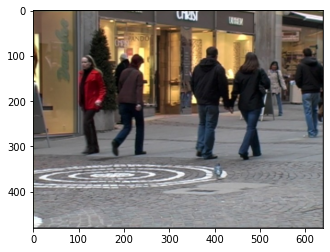

In [13]:
fn = os.path.join(mot_benchmark, phase, seq, 'img1', '%06d.jpg'%(frame))
print(fn)
im =io.imread(fn)
plt.imshow(im)

In [14]:
#define constant velocity model
kf = KalmanFilter(dim_x=7, dim_z=4) 
kf.F = np.array([[1,0,0,0,1,0,0],[0,1,0,0,0,1,0],[0,0,1,0,0,0,1],[0,0,0,1,0,0,0],  [0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1]])
kf.H = np.array([[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0]])

In [15]:
kf.R[2:,2:] *= 10.
kf.R

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0., 10.,  0.],
       [ 0.,  0.,  0., 10.]])

In [16]:
kf.P[4:,4:] *= 1000. #give high uncertainty to the unobservable initial velocities
kf.P *= 10.
kf.P

array([[   10.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,    10.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,    10.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,    10.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0., 10000.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0., 10000.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0., 10000.]])

In [17]:
kf.Q[-1,-1] *= 0.01
kf.Q[4:,4:] *= 0.01
kf.Q

array([[1.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 1.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.01  , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.01  , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0001]])

In [18]:
kf.x

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])